<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/03-23-2020.csv"
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
us_pop = 329968629  #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US: {res.positive/us_pop*100:2f}%")

positive     42164
negative    237321
pending      14571
total       294056
dtype: int64
Current Infection Rate 14.338765%
Percentage of US: 0.012778%


In [7]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,20875,57414
34,NJ,2844,359
52,WA,1996,28879
5,CA,1733,12567
24,MI,1328,2069
16,IL,1285,8583
20,LA,1172,4776
10,FL,1171,11063
21,MA,777,8145
11,GA,772,4297


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [9]:
dfUSAPos[-7:]

,date,positive,PCT
13,20200317,5723,0.135732
14,20200318,7731,0.183355
15,20200319,11723,0.278033
16,20200320,17038,0.404089
17,20200321,23203,0.550304
18,20200322,31888,0.756285
19,20200323,42164,1.000000


In [10]:
dfCAPos[-7:]

,date,positive,PCT
13,20200317,483,0.278707
14,20200318,611,0.352568
15,20200319,924,0.533179
16,20200320,1063,0.613387
17,20200321,1279,0.738027
18,20200322,1536,0.886324
19,20200323,1733,1.000000


In [11]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalized,death,total
date,,,,,,
20200319,11723,89119,3025,0.0,160,103867
20200320,17038,118147,3336,0.0,219,138521
20200321,23203,155909,3477,1964.0,272,182589
20200322,31888,193463,2842,2554.0,398,228216
20200323,42164,237321,14571,3325.0,471,294056


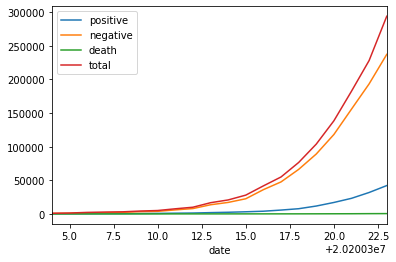

In [12]:
gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [13]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
20200310,472,19
20200311,696,25
20200312,987,29
20200313,1264,36
20200314,1678,41
20200315,1678,41
20200316,1678,41
20200317,3503,58
20200318,3536,58


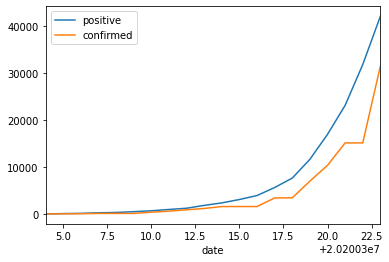

In [14]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [16]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalized,death,total
date,,,,,,
20200317,483,7981,0,0.0,11,8407
20200318,611,7981,0,0.0,13,8592
20200319,924,8787,0,0.0,18,9711
20200320,1063,10424,0,0.0,20,11487
20200321,1279,11249,0,0.0,24,12528
20200322,1536,11304,0,0.0,27,12840
20200323,1733,12567,12100,0.0,27,26400


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    43667
dead           552
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    2108
dead           39
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [34]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
China             81496
Italy             63927
US                43667
Spain             35136
Germany           29056
Iran              23049
France            20123
Korea, South       8961
Switzerland        8795
United Kingdom     6726
Name: confirmed, dtype: int64

In [21]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
China             81496
Italy             63927
US                43667
Spain             35136
Germany           29056
Iran              23049
France            20123
Korea, South       8961
Switzerland        8795
United Kingdom     6726
Netherlands        4764
Austria            4474
Belgium            3743
Norway             2621
Canada             2088
Portugal           2060
Sweden             2046
Brazil             1924
Australia          1682
Denmark            1572
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [36]:
dfState.loc['NY'].head(7)

,date,positive,current_total,pct
state,,,,
NY,20200323,20875,20875,1.000000
NY,20200322,15168,20875,0.726611
NY,20200321,10356,20875,0.496096
NY,20200320,7102,20875,0.340216
NY,20200319,4152,20875,0.198898
NY,20200318,2382,20875,0.114108
NY,20200317,1700,20875,0.081437


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

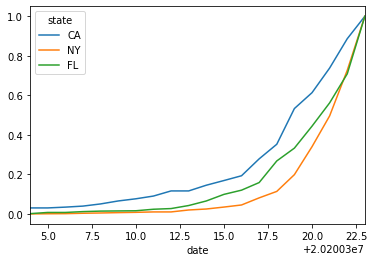

In [42]:
x = res.loc[:, ['CA','NY','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

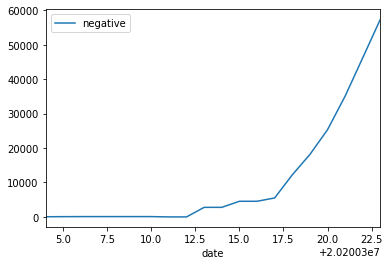

In [41]:
x = dfNYTesting.plot.line()

In [52]:
dfDates[(dfDates.state.isin(['GA']))].head(10)

,state,date,positive,current_total,pct
194,GA,20200323,772,772,1.000000
195,GA,20200322,600,772,0.777202
196,GA,20200321,507,772,0.656736
197,GA,20200320,420,772,0.544041
198,GA,20200319,287,772,0.371762
199,GA,20200318,197,772,0.255181
200,GA,20200317,146,772,0.189119
201,GA,20200316,121,772,0.156736
202,GA,20200315,99,772,0.128238
203,GA,20200314,66,772,0.085492


In [81]:
datecutoff = int(((pd.to_datetime(str(dfDates.date.max())))-datetime.timedelta(days=2)).strftime("%Y%m%d"))
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .55)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
651,NY,20200321,10356,20875,0.496096
595,NJ,20200321,1327,2844,0.466596
350,LA,20200321,585,1172,0.499147
122,CT,20200321,194,415,0.467470
770,SC,20200321,152,299,0.508361
846,UT,20200321,136,257,0.529183
296,IN,20200321,126,259,0.486486
632,NV,20200321,124,245,0.506122
63,AZ,20200321,104,265,0.392453
460,MO,20200321,73,183,0.398907


20200301